In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_csv('Social_Network_Ads.csv')


X = dataset.iloc[:, [2, 3]].values   
y = dataset.iloc[:, 4].values        


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_nb = confusion_matrix(y_test, y_pred_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Naïve Bayes Confusion Matrix:\n", cm_nb)
print("Naïve Bayes Accuracy:", acc_nb)






from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=100, criterion='entropy', random_state=0
)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest Confusion Matrix:\n", cm_rf)
print("Random Forest Accuracy:", acc_rf)

from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', random_state=0)
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

cm_svm = confusion_matrix(y_test, y_pred_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)

print("\nKernel SVM Confusion Matrix:\n", cm_svm)
print("Kernel SVM Accuracy:", acc_svm)


Naïve Bayes Confusion Matrix:
 [[65  3]
 [ 7 25]]
Naïve Bayes Accuracy: 0.9

Random Forest Confusion Matrix:
 [[63  5]
 [ 4 28]]
Random Forest Accuracy: 0.91

Kernel SVM Confusion Matrix:
 [[64  4]
 [ 3 29]]
Kernel SVM Accuracy: 0.93


In [5]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


dataset = pd.read_csv("tennis.csv")


le = LabelEncoder()

for column in dataset.columns:
    dataset[column] = le.fit_transform(dataset[column])


X = dataset.iloc[:, :-1]   
y = dataset.iloc[:, -1]    


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)


classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[0 0]
 [2 2]]
Accuracy: 0.5


In [1]:

import numpy as np
import pandas as pd


dataset = pd.read_csv('Social_Network_Ads.csv')


X = dataset.iloc[:, [2, 3]].values    
y = dataset.iloc[:, 4].values         


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
    p=2      
)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[64  4]
 [ 3 29]]
Accuracy: 0.93


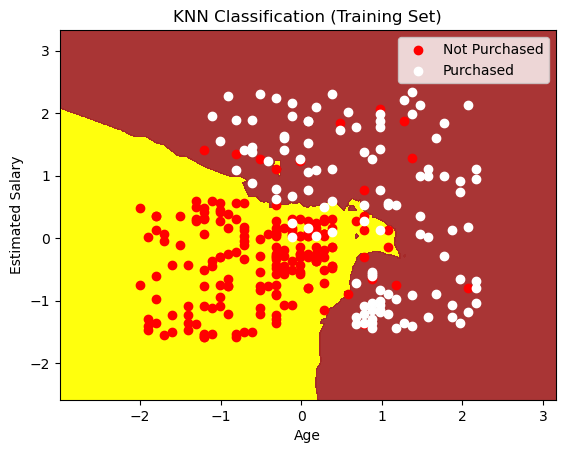

Accuracy: 0.93
Precision: 0.8787878787878788


In [24]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

dataset = pd.read_csv("User_Data.csv")


X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
    np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
)

plt.contourf(
    X1, X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.95,
    cmap=ListedColormap(('yellow', 'brown'))
)

plt.scatter(
    X_set[y_set == 0, 0], X_set[y_set == 0, 1],
    c='red', label='Not Purchased'
)
plt.scatter(
    X_set[y_set == 1, 0], X_set[y_set == 1, 1],
    c='white', label='Purchased'
)

plt.title('KNN Classification (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

y_pred = classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
